# Lesson13 - AB Testing

The first change Audacity wants to try is on their homepage. They hope that this new, more engaging design will increase the number of users that explore their courses, that is, move on to the second stage of the funnel.

The metric we will use is the click through rate for the Explore Courses button on the home page. Click through rate (CTR) is often defined as the the number of clicks divided by the number of views. Since Audacity uses cookies, we can identify unique users and make sure we don't count the same one multiple times. For this experiment, we'll define our click through rate as:

CTR: # clicks by unique users / # views by unique users

Now that we have our metric, let's set up our null and alternative hypotheses:

H0:CTRnew≤CTRoldH_0: CTR_{new} \leq CTR _{old} H0​:CTRnew​≤CTRold​

H1:CTRnew>CTRoldH_1: CTR_{new} > CTR _{old} H1​:CTRnew​>CTRold​

Our alternative hypothesis is what we want to prove to be true, in this case, that the new homepage design has a higher click through rate than the old homepage design. And the null hypothesis is what we assume to be true before analyzing data, which is that the new homepage design has a click through rate that is less than or equal to that of the old homepage design. As you’ve seen before, we can rearrange our hypotheses to look like this:

H0:CTRnew−CTRold≤0H_0: CTR_{new} - CTR_{old} \leq 0 H0​:CTRnew​−CTRold​≤0
H1:CTRnew−CTRold>0H_1: CTR_{new} - CTR_{old} > 0 H1​:CTRnew​−CTRold​>0


## 6 - Homepage Experiment Data

In [4]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
def pv(variable):
    if(len(variable)>1): print(variable, ":", eval(variable))

In [29]:
import pandas as pd

df = pd.read_csv('homepage_actions.csv')
df.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


### 1. Match the following characteristics of this dataset: 
- total number of actions
- number of unique users
- sizes of the control and experiment groups (i.e., the number of unique users in each group)

In [19]:
df.shape[0]
df.id.unique().shape[0]
df[df['group']=='experiment'].id.unique().shape[0]
df[df['group']=='control'].id.nunique()

8188

6328

2996

3332

### 2. How long was the experiment run for? 
Hint: the records in this dataset are ordered by timestamp in increasing order

In [13]:
df.timestamp.min()
df.timestamp.max()

'2016-09-24 17:42:27.839496'

'2017-01-18 10:24:08.629327'

### 3. What action types are recorded in this dataset?
(i.e., What are the unique values in the action column?)

In [14]:
df.action.unique()

array(['view', 'click'], dtype=object)

### 6. What are the null and alternative hypotheses?
Use $CTR_{old}$ and $CTR_{new}$ in your hypotheses.

$$H_0: $CTR_{new}$ - $CTR_{old}$ <= 0 $$
$$H_1: $CTR_{new}$ - $CTR_{old}$ > 0 $$

In [24]:
control_df = df[df['group']=='control']
control_ctr = control_df.query('action == "click"').id.nunique() / control_df.query('action == "view"').id.nunique()
pv("control_ctr")

control_ctr : 0.2797118847539016


In [25]:
experiment_df = df[df['group']=='experiment']
experiment_ctr = experiment_df.query('action == "click"').id.nunique() / experiment_df.query('action == "view"').id.nunique()
pv("experiment_ctr")

experiment_ctr : 0.3097463284379172


In [27]:
obs_diff = experiment_ctr - control_ctr
pv("obs_diff")

obs_diff : 0.030034443684015644


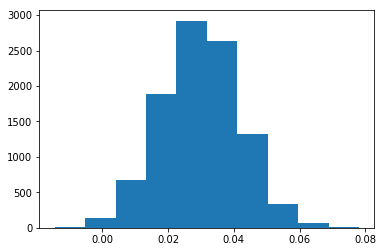

In [35]:
import matplotlib.pyplot as plt
diffs = []
for _ in range(10_000):
    b_samp = df.sample(df.shape[0], replace = True)
    control_df = b_samp[b_samp['group']=='control']
    control_ctr = control_df.query('action == "click"').id.nunique() / control_df.query('action == "view"').id.nunique()
    experiment_df = b_samp[b_samp['group']=='experiment']
    experiment_ctr = experiment_df.query('action == "click"').id.nunique() / experiment_df.query('action == "view"').id.nunique()
    diffs.append(experiment_ctr - control_ctr)
plt.hist(diffs);

(array([  10.,   94.,  503., 1542., 2728., 2777., 1597.,  625.,  115.,
           9.]),
 array([-0.04532774, -0.03630821, -0.02728869, -0.01826916, -0.00924964,
        -0.00023011,  0.00878941,  0.01780894,  0.02682846,  0.03584799,
         0.04486751]),
 <a list of 10 Patch objects>)

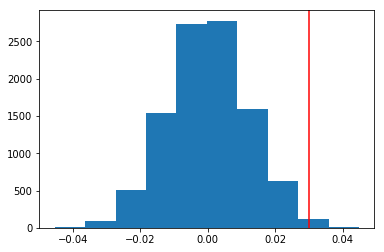

In [37]:
import numpy as np
diffs = np.array(diffs)
null_vals = np.random.normal(0, diffs.std(), diffs.size)
plt.hist(null_vals);
plt.axvline(x=obs_diff, color='r')

In [38]:
pvalue = (null_vals > obs_diff).mean() # proportion of times the null_vals is above the observation.
pv("pvalue")
if pvalue > 0.05:
    print("The null is statistically significant.")
else:
    print("We reject the null hypothesis : we suggest to put the experiment in production")

pvalue : 0.005
We reject the null hypothesis : we suggest to put the experiment in production


array([False, False, False, ..., False, False, False])

In [ ]:
# 10 - Enrollment Rate

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


control_ctr : 0.2364438839848676
experiment_ctr : 0.2668693009118541
obs_diff : 0.030425416926986526


(array([  11.,  132.,  535., 1503., 2585., 2809., 1697.,  579.,  127.,
          22.]),
 array([-0.02580029, -0.01472777, -0.00365525,  0.00741727,  0.01848978,
         0.0295623 ,  0.04063482,  0.05170734,  0.06277985,  0.07385237,
         0.08492489]),
 <a list of 10 Patch objects>)

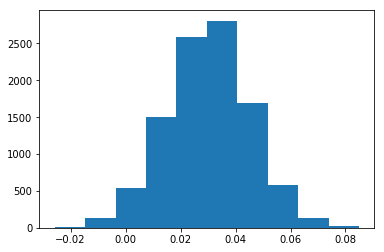

(array([2.300e+01, 1.420e+02, 5.290e+02, 1.049e+03, 1.224e+03, 7.510e+02,
        2.890e+02, 5.900e+01, 7.000e+00, 1.000e+00]),
 array([-0.04855944, -0.0370226 , -0.02548576, -0.01394893, -0.00241209,
         0.00912475,  0.02066158,  0.03219842,  0.04373525,  0.05527209,
         0.06680893]),
 <a list of 10 Patch objects>)

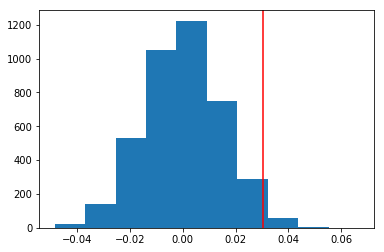

pvalue : 0.020373097692685322
We reject the null hypothesis : we suggest to put the experiment in production


In [40]:
np.random.seed(42)
df = pd.read_csv('course_page_actions.csv')
df.head()
# Get dataframe with all records from control group
control_df = df.query('group == "control"')

# Compute click through rate for control group
control_ctr = control_df.query('action == "enroll"').id.nunique() / control_df.query('action == "view"').id.nunique()

# Display click through rate
pv("control_ctr")
# Get dataframe with all records from experiment group
experiment_df = df[df['group']=='experiment']
experiment_ctr = experiment_df.query('action == "enroll"').id.nunique() / experiment_df.query('action == "view"').id.nunique()
pv("experiment_ctr")

# Compute the observed difference in click through rates
obs_diff = experiment_ctr - control_ctr

# Display observed difference
pv("obs_diff")

# Create a sampling distribution of the difference in proportions
# with bootstrapping
diffs = []
size = df.shape[0]
for _ in range(10_000):
    b_samp = df.sample(size, replace=True)
    control_df = b_samp.query('group == "control"')
    experiment_df = b_samp.query('group == "experiment"')
    control_ctr = control_df.query('action == "enroll"').id.nunique() / control_df.query('action == "view"').id.nunique()
    experiment_ctr = experiment_df.query('action == "enroll"').id.nunique() / experiment_df.query('action == "view"').id.nunique()
    diffs.append(experiment_ctr - control_ctr)

# Convert to numpy array
diffs = np.array(diffs)

# Plot sampling distribution
plt.hist(diffs);
plt.show();


In [77]:
df.timestamp.min()
df.timestamp.max()

'2015-08-10 17:06:01.032740'

'2016-01-19 15:21:31.634379'

(array([  23.,  137.,  621., 1682., 2573., 2661., 1567.,  599.,  115.,
          22.]),
 array([-0.05340445, -0.04267922, -0.031954  , -0.02122877, -0.01050354,
         0.00022168,  0.01094691,  0.02167214,  0.03239737,  0.04312259,
         0.05384782]),
 <a list of 10 Patch objects>)

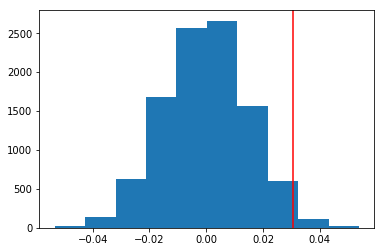

pvalue : 0.0199
We reject the null hypothesis : we suggest to put the experiment in production


In [41]:
# Simulate distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)

# Plot the null distribution
plt.hist(null_vals);
# Plot observed statistic with the null distibution
plt.axvline(x=obs_diff, color='r')
plt.show();
# Compute p-value
pvalue = (null_vals > obs_diff).mean() # proportion of times the null_vals is above the observation.
pv("pvalue")
alpha = 0.05
if pvalue > alpha:
    print("The null is statistically significant.")
else:
    print("We reject the null hypothesis : we suggest to put the experiment in production")

# 12 - Metric - Average Classroom Time

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




df = pd.read_csv('classroom_actions.csv')
df.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


(73.36899038461539, 74.6715935334873)

1.3026031488719099

size : 3829


(array([   5.,   42.,  332., 1241., 2587., 2966., 1887.,  759.,  159.,
          22.]),
 array([-1.71018109e+00, -1.14129540e+00, -5.72409700e-01, -3.52400341e-03,
         5.65361693e-01,  1.13424739e+00,  1.70313309e+00,  2.27201878e+00,
         2.84090448e+00,  3.40979018e+00,  3.97867587e+00]),
 <a list of 10 Patch objects>)

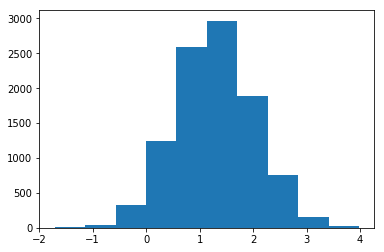

(array([4.000e+01, 2.840e+02, 1.180e+03, 2.490e+03, 3.020e+03, 2.047e+03,
        7.780e+02, 1.430e+02, 1.700e+01, 1.000e+00]),
 array([-2.47976526, -1.90628735, -1.33280944, -0.75933154, -0.18585363,
         0.38762428,  0.96110218,  1.53458009,  2.108058  ,  2.6815359 ,
         3.25501381]),
 <a list of 10 Patch objects>)

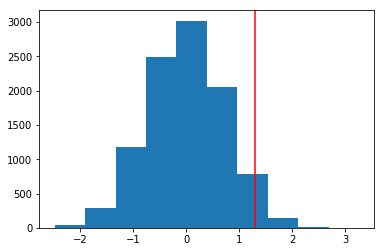

pvalue : 0.0384
We reject the null hypothesis : we suggest to put the experiment in production


In [53]:
np.random.seed(42)
# The total_days represents the total amount of time
# each student has spent in classroom.
# get the average classroom time for control group
control_mean = df[df['group'] == 'control'].total_days.mean()

# get the average classroom time for experiment group
experiment_mean = df[df['group'] == 'experiment'].total_days.mean()

# display average classroom time for each group
control_mean, experiment_mean

# compute observed difference in classroom time
obs_diff = experiment_mean - control_mean

# display observed difference
obs_diff

# create sampling distribution of difference in average classroom times
# with boostrapping
size = len(df)
pv("size")
diffs = []
for _ in range(10000):
    b_samp = df.sample(size, replace=True)
    control_df = b_samp.query('group == "control"')
    experiment_df = b_samp.query('group == "experiment"')
    control_days = control_df.total_days.mean()
    experiment_days = experiment_df.total_days.mean()
    diffs.append(experiment_days - control_days)


# Convert to numpy array
diffs = np.array(diffs)

# Plot sampling distribution
plt.hist(diffs);
plt.show();

# Simulate distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)

# Plot the null distribution
plt.hist(null_vals);
# Plot observed statistic with the null distibution
plt.axvline(x=obs_diff, color='r')
plt.show();
# Compute p-value
pvalue = (null_vals > obs_diff).mean() # proportion of times the null_vals is above the observation.
pv("pvalue")
alpha = 0.05
if pvalue > alpha:
    print("The null is statistically significant.")
else:
    print("We reject the null hypothesis : we suggest to put the experiment in production")

# 13 - Metric - Completion Rate

In [78]:
df = pd.read_csv('classroom_actions.csv')
df.head()
df.timestamp.min()
df.timestamp.max()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


'2015-08-10 17:06:01.032740'

'2016-01-19 15:21:31.634379'

In [72]:
np.random.seed(42)
# Create dataframe with all control records
control_df = df[df['group'] == 'control']

# Compute completion rate
control_ctr = len(control_df.query("completed == True")) / len(control_df)
# Display completion rate
pv("control_ctr")


# Create dataframe with all experiment records
experiment_df = df[df['group'] == 'experiment']

# Compute completion rate
experiment_ctr = len(experiment_df.query("completed == True")) / len(experiment_df)

# Display completion rate
pv("experiment_ctr")

# Compute observed difference in completion rates
obs_diff = experiment_ctr - control_ctr

# Display observed difference in completion rates
pv("obs_diff")

control_ctr : 0.3719951923076923
experiment_ctr : 0.3935334872979215
obs_diff : 0.02153829499022919


In [73]:
# Create sampling distribution for difference in completion rates
# with boostrapping
diffs = []
size = len(df)
for _ in range(10_000):
    b_samp = df.sample(size, replace=True)
    control_df = b_samp.query('group == "control"')
    experiment_df = b_samp.query('group == "experiment"')
    control_ctr = len(control_df.query("completed == True")) / len(control_df)
    experiment_ctr = len(experiment_df.query("completed == True")) / len(experiment_df)
    diffs.append(experiment_ctr - control_ctr)

(array([  10.,   85.,  449., 1353., 2457., 2778., 1837.,  776.,  223.,
          32.]),
 array([-0.0381512 , -0.02679438, -0.01543755, -0.00408072,  0.0072761 ,
         0.01863293,  0.02998976,  0.04134658,  0.05270341,  0.06406024,
         0.07541706]),
 <a list of 10 Patch objects>)

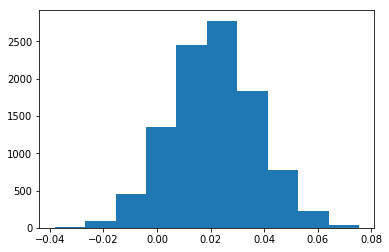

(array([4.000e+01, 2.840e+02, 1.180e+03, 2.490e+03, 3.020e+03, 2.047e+03,
        7.780e+02, 1.430e+02, 1.700e+01, 1.000e+00]),
 array([-0.05339843, -0.04104935, -0.02870027, -0.01635119, -0.00400211,
         0.00834697,  0.02069605,  0.03304513,  0.04539421,  0.05774329,
         0.07009237]),
 <a list of 10 Patch objects>)

pvalue : 0.0846
The null is statistically significant.


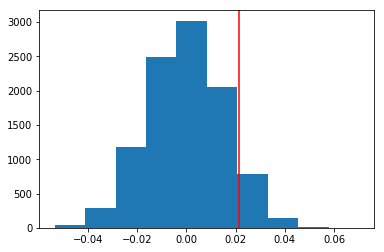

In [74]:
# convert to numpy array
diffs = np.array(diffs)
# plot distribution
plt.hist(diffs);
plt.show();
# create distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), len(diffs) )
# plot null distribution
plt.hist(null_vals);
# plot line for observed statistic
plt.axvline(x=obs_diff, color='r');
plt.show();
# compute p value
pvalue = (null_vals > obs_diff).mean() # proportion of times the null_vals is above the observation.
pv("pvalue")
alpha = 0.05
if pvalue > alpha:
    print("The null is statistically significant.")
else:
    print("We reject the null hypothesis : we suggest to put the experiment in production")

# Quiz: Analyzing Multiple Metrics

To compute the new bonferroni correct alpha value, we need to divide the original alpha value by the number of tests.

The Bonferroni correction compensates for that increase by testing each individual hypothesis at a significance level of $α/m$, where $α$ is the desired overall alpha level and $m$ is the number of hypotheses.


    Enrollment Rate: 0.0188
    Average Reading Duration: 0
    Average Classroom Time: 0.0384
    Completion Rate: 0.0846


In [76]:
pv("0.05/2")
Enrollment_Rate=0.0188
pv("Enrollment_Rate/2")
Average_Reading_Duration=0
Average_Classroom_Time=0.0384
pv("Average_Classroom_Time/2")
Completion_Rate=0.0846
pv("Completion_Rate/2")

0.05/2 : 0.025
Enrollment_Rate/2 : 0.0094
Average_Classroom_Time/2 : 0.0192
Completion_Rate/2 : 0.0423


# 17 - Difficulties in A/B Testing

As you saw in the scenarios above, there are many factors to consider when designing an A/B test and drawing conclusions based on its results. To conclude, here are some common ones to consider.

    Novelty effect and change aversion when existing users first experience a change
    Sufficient traffic and conversions to have significant and repeatable results
    Best metric choice for making the ultimate decision (eg. measuring revenue vs. clicks)
    Long enough run time for the experiment to account for changes in behavior based on time of day/week or seasonal events.
    Practical significance of a conversion rate (the cost of launching a new feature vs. the gain from the increase in conversion)
    Consistency among test subjects in the control and experiment group (imbalance in the population represented in each group can lead to situations like Simpson's Paradox)

